In [89]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd 

import nltk
import numpy as np


import openpyxl
from PIL import Image

In [69]:
df = pd.read_excel("D:/difods_2023_prod/sentiment/discussion.xlsx")

In [70]:
df.head()

,id,discussion,parent,userid,userfullname,created,modified,mailed,subject,message,messageformat,messagetrust,attachment,totalscore,mailnow,deleted,privatereplyto,privatereplytofullname,wordcount,charcount
0,12,6,0,2,Admin User,1688001418,1688001418,1,Mensaje de bienvenida,ESTIMADA/O DOCENTE:\n\nTe damos la bienvenida ...,2,0,0,0,0,0,0,NaN,250,1413
1,13,7,0,2,Admin User,1688001418,1688001418,1,Mensaje de bienvenida,ESTIMADA/O DOCENTE:\n\nTe damos la bienvenida ...,2,0,0,0,0,0,0,NaN,250,1413
2,14,8,0,2,Admin User,1688001418,1688001418,1,Mensaje de bienvenida,ESTIMADA/O DOCENTE:\n\nTe damos la bienvenida ...,2,0,0,0,0,0,0,NaN,250,1413
3,15,9,0,2,Admin User,1688001418,1688001418,1,Mensaje de bienvenida,ESTIMADA/O DOCENTE:\n\nTe damos la bienvenida ...,2,0,0,0,0,0,0,NaN,250,1413
4,16,10,0,2,Admin User,1688001418,1688001418,1,Mensaje de bienvenida,ESTIMADA/O DOCENTE:\n\nTe damos la bienvenida ...,2,0,0,0,0,0,0,NaN,250,1413


In [105]:
print("# de comentarios en el foro: %d " %df.shape[0]) 

# de comentarios en el foro: 4127 


In [72]:
df_1 = df[df['userfullname']!='Admin User']

In [103]:
print("# de usuarios: %d" % len(df_1.userid.unique()))

# de usuarios: 2587


In [73]:
df_target = df_1[['subject','message','wordcount','charcount']]

In [74]:
df_target

,subject,message,wordcount,charcount
74,Foro,"Saludos cordiales, interesado en los nuevos ap...",21,122
75,Re: Mensaje de bienvenida,Muy buenas noches le escribe Amelia Flora Seas...,51,252
76,Mensaje de bienvenida,Soy la docente Carmen Huayanca Velazco de la I...,87,496
77,Re: Mensaje de bienvenida,"- Buenas noches, mi nombre es Rosas Edilberto ...",104,650
78,Re: Mensaje de bienvenida,Mi nombre es Carlos medina Casana trabajo en e...,87,458
...,...,...,...,...
4122,Re: Presentación.,"Estimados colegas muy buen día, soy Celi Criol...",66,397
4123,Re: Mensaje de bienvenida,"Saludos cordiales apreciada maestra, soy Fredy...",150,808
4124,Re: Mensaje de bienvenida,Mi nombre es Victor Mazzi Cortez soy docente d...,80,396
4125,Re: Mensaje de bienvenida,me encanta poder compartir este espacio de for...,58,299


In [75]:
df_target.subject.value_counts()

subject
Re: Mensaje de bienvenida                                    2575
Presentación                                                  102
Re: Presentación                                               81
PRESENTACIÓN                                                   76
Re: PRESENTACIÓN                                               52
                                                             ... 
FORO                                                            1
YLEANA BEATRIZ RODRIGUEZ CALDERON I.E 00015 PIONEROS ALTO       1
expectativa                                                     1
Re: Narda Ramos Valverde                                        1
Re: Bienvenida al curso virtual                                 1
Name: count, Length: 444, dtype: int64

In [76]:
text = " ".join(review for review in df_target.message)

In [83]:
from nltk.corpus import stopwords
nltk.download("stopwords")
stopwords= set(stopwords.words('spanish'))
stopwords.update(['aula','curso'])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DIFODS103\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [84]:
#generar nube de palabras
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

In [85]:
def plot_cloud(wordcloud):
    # Se establece el tamaño de la imagen
    plt.figure(figsize=(20, 10))
    # Mostrar la imagen
    plt.imshow(wordcloud) 
    # Eje sin detalles
    plt.axis("off");

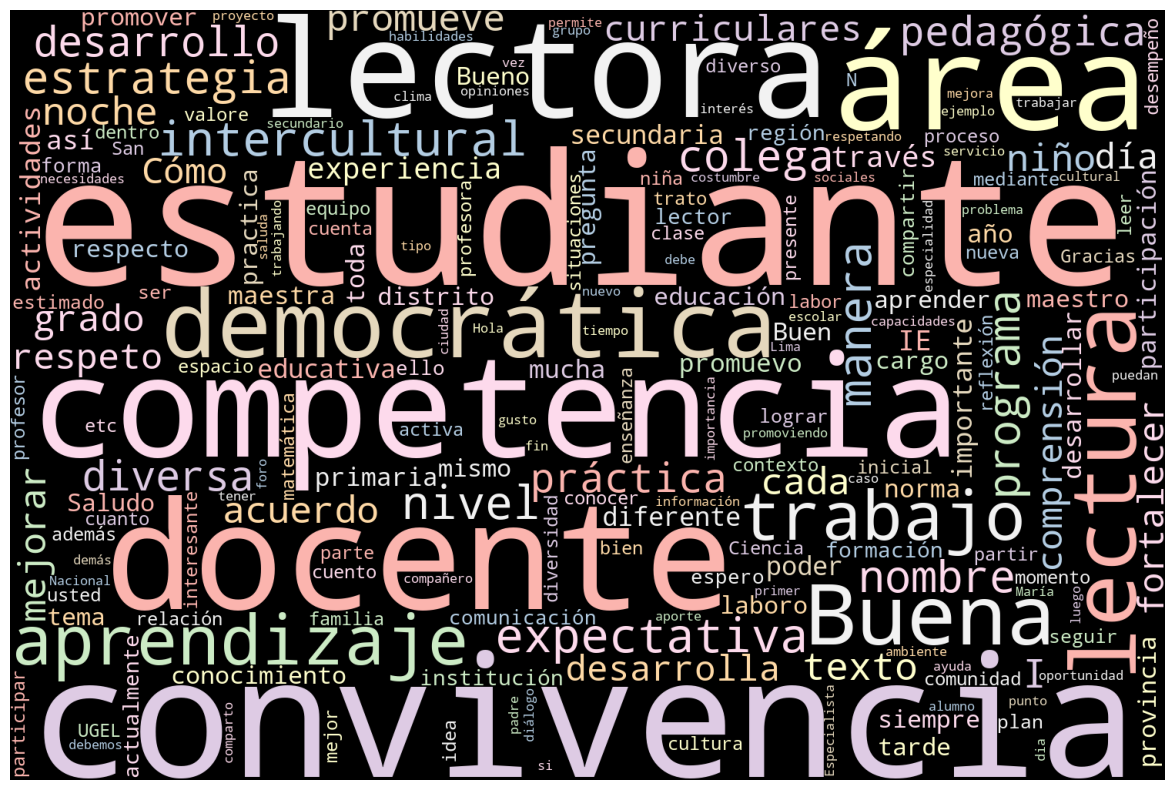

In [86]:
wordcloud = WordCloud(width = 1500, 
                      height = 1000, 
                      random_state=1, 
                      background_color='black', 
                      colormap='Pastel1', 
                      collocations=False, 
                      stopwords = stopwords).generate(text)
# Impresion
plot_cloud(wordcloud)

In [106]:
from sklearn.feature_extraction.text import CountVectorizer

In [107]:
cv = CountVectorizer(stop_words=stopwords, ngram_range=(1,3))